In [11]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from scipy.stats import lognorm, norm


In [15]:
# Load Data
init_values = pd.read_excel('init_values.xlsx', index_col=0)
# Extract the initial 5-year EUR yield
initial_5y_eur_yield = init_values.loc['5Y EUR'].values[0]
cov_matrix = pd.read_excel('covariance_matrix.xlsx', index_col=0)

print(initial_5y_eur_yield)

0.02004730805076598


In [18]:
mean_vector = np.zeros(len(cov_matrix)) 
yield_index = cov_matrix.index.get_loc('5Y EUR')

# The mean and std for the 5Y EUR yield increment
mu_y = mean_vector[yield_index]
sigma_y = np.sqrt(cov_matrix.iloc[yield_index, yield_index])

print(mu_y, sigma_y)

0.0 0.0008511682809833435


In [20]:
# Set number of simulations
N = 10000

simulated_increments = np.random.multivariate_normal(mean=mean_vector, cov=cov_matrix, size=N)
simulated_5y_changes = simulated_increments[:, yield_index]

final_4y_yields = initial_5y_eur_yield + simulated_5y_changes
final_bond_prices = np.exp(-4.0 * final_4y_yields)

print(final_bond_prices)

[0.92345687 0.92468539 0.91959425 ... 0.92083433 0.92268441 0.92073645]


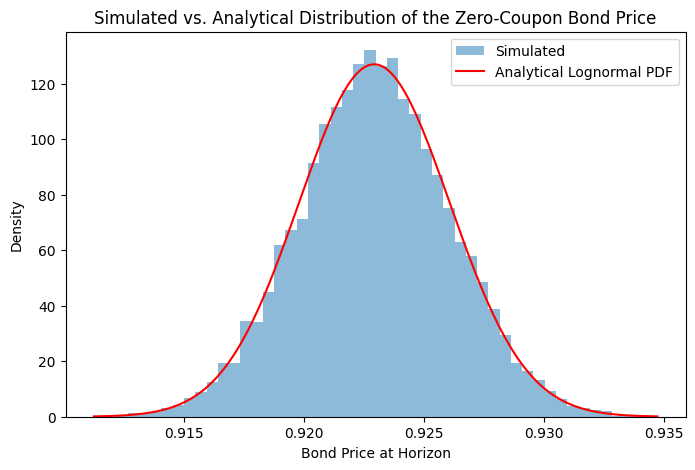

In [21]:
y_mean = initial_5y_eur_yield + mu_y
y_std = sigma_y

m = -4 * y_mean
s = 4 * y_std

# Let's plot the simulated distribution vs. theoretical PDF:
fig, ax = plt.subplots(figsize=(8,5))

# Plot histogram of simulated bond prices
count, bins, _ = ax.hist(final_bond_prices, bins=50, density=True, alpha=0.5, label='Simulated')

# Theoretical lognormal PDF
pdf_x = np.linspace(bins[0], bins[-1], 200)
pdf_y = (1/(pdf_x * s * np.sqrt(2*np.pi))) * np.exp(- (np.log(pdf_x) - m)**2 / (2*s**2))

ax.plot(pdf_x, pdf_y, 'r-', label='Analytical Lognormal PDF')

ax.set_xlabel('Bond Price at Horizon')
ax.set_ylabel('Density')
ax.legend()
plt.title('Simulated vs. Analytical Distribution of the Zero-Coupon Bond Price')
plt.show()


